In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

In [2]:
contigs = ['2R', '2L', '3R', '3L', 'X']

df_dict = {}
ratios = np.array([])
for contig in contigs:
    df_dict[contig] = pd.read_csv(f"../../results/variantAnalysis/selection/fst/Fst_BusiaParental_BusiaSelected.large.{contig}.tsv", sep="\t")
    print(df_dict[contig]['midpoint'].max())
                                  
contigs = pd.read_csv("/home/sanj/ag1000g/data/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa.fai", sep="\t", header=None)
contigs = contigs.rename(columns={0:'contig', 1:'end'}).query("contig in ['2R', '2L', '3L', '3R', 'X']")
contigs = contigs.drop(columns=[2,3,4])
contigs

58164189.0
48924518.0
51405061.5
41148690.0
19952281.0


,contig,end
0,2R,61545105
1,3R,53200684
2,2L,49364325
4,3L,41963435
5,X,24393108


In [3]:
df_dict['2L']['midpoint'] = df_dict['2L']['midpoint'] + 61545105
df_dict['3L']['midpoint'] = df_dict['3L']['midpoint'] + 53200684

In [4]:
df_dict['2'] = pd.concat([df_dict['2R'], df_dict['2L']]).reset_index(drop=True)
df_dict['3'] = pd.concat([df_dict['3R'], df_dict['3L']]).reset_index(drop=True)

ratios = [df_dict['2']['midpoint'].max(), df_dict['3']['midpoint'].max(), df_dict['X']['midpoint'].max()]

In [5]:
def addInversion(ax, start, size, freq, inversion = '2La', color='indianred'):
    ### Add inversions ###
    # Create a Rectangle patch
    rect = patches.Rectangle((start, 0), size, 1, linewidth=3,
                            edgecolor='none', facecolor=color, alpha=freq)
    ax.add_patch(rect)

    # start vertical line
    l = matplotlib.lines.Line2D([start, start], [0, 1], color="grey", linewidth=1, linestyle='--')   #line 
    ax.add_line(l)
    l = matplotlib.lines.Line2D([start+size, start+size], [0, 1], color="grey", linewidth=1, linestyle='--')   #line 
    ax.add_line(l)

    mid =  start + (size/2)
    # add freq
    if inversion == '2Rb':
        ax.annotate(inversion, xy=(mid-2_500_000,5.2),# rotation=90,
               size=13)
    else:
        ax.annotate(inversion, xy=(mid-2_000_000,5.2),# rotation=90,
               size=13)    

In [6]:
inv2la_start = 20524058
inv2la_end   = 42165532 
inv2la_start = inv2la_start + 61545105
inv2la_size = (inv2la_end + 61545105)-inv2la_start

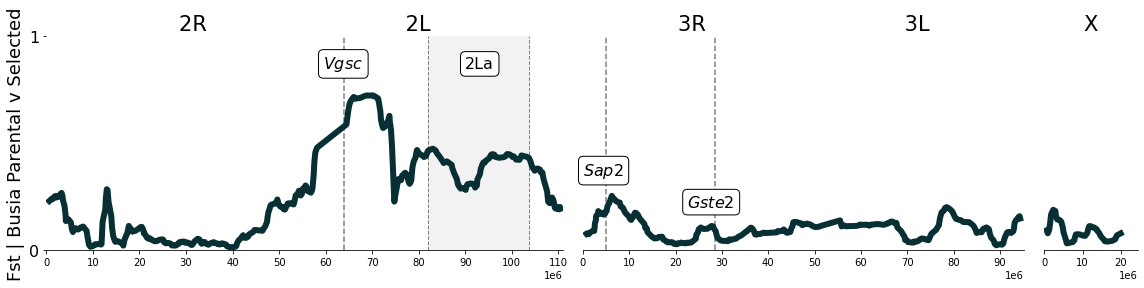

In [59]:
chroms = ['2', '3', 'X']

fig, ax = plt.subplots(1,3, figsize=[16,4], gridspec_kw={'width_ratios':ratios})
for axes in ax:
    sns.despine(ax=axes, left=True)
    axes.set_ylim(0,1)
    axes.set_xlabel(" ")

ax[0].set_ylabel("Fst | Busia Parental v Selected", rotation=90, fontsize=18)

ax[0].set_yticks([0,1])
ax[0].yaxis.set_tick_params(labelsize=16)
for axes in ax[1:]:
    axes.set_yticks([])

ax[0].axvline(2_453_158 + 61545105, linestyle='--', color='grey')
ax[0].text(59500000, 0.85, "$\it{Vgsc}$", fontsize=16,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.3))
ax[0].text(90_000_000, 0.85, "2La", fontsize=16,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.3))

ax[1].axvline(4_860_158, linestyle='--', color='grey')
ax[1].text(60_158, 0.35, "$\it{Sap2}$", fontsize=16,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.3))

ax[1].axvline(28_500_000, linestyle='--', color='grey')
ax[1].text(22_550_000, 0.20, "$\it{Gste2}$", fontsize=16,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.3))


addInversion(ax=ax[0], start=inv2la_start, size=inv2la_size, freq=0.1, inversion='2La', color='grey')

for idx, contig in enumerate(chroms):
    if contig == '2':
        max_ = (61545105 + 49364325)
        ax[idx].set_title("2R                              2L", fontsize=21)
    elif contig == '3':
        max_ = 53200684 + 41963435
        ax[idx].set_title("3R                              3L", fontsize=21)
    elif contig == 'X':
        max_ = 24393108
        ax[idx].set_title(contig, fontsize=21)
    ax[idx].set_xlim(0, max_)
    xtick = np.arange(0, max_, 10000000)
    ax[idx].set_xticks(xtick, fontsize=42)
    ax[idx].ticklabel_format(style='sci', scilimits=(6,6), axis='x')
    sns.lineplot(ax=ax[idx], x=df_dict[contig]['midpoint'], y=df_dict[contig]['Fst'], linewidth=6, color='#083034ff')

plt.tight_layout()
plt.savefig("../../results/variantAnalysis/selection/fst/allChroms.svg", dpi=300)